In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [19]:
df=pd.read_excel("Online Retail.xlsx")
df=df.sample(frac=0.05).reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562608,23168,CLASSIC CAFE SUGAR DISPENSER,12,2011-08-08 11:45:00,1.25,15502.0,United Kingdom
1,553864,21294,ETCHED GLASS COASTER,24,2011-05-19 14:08:00,0.39,15862.0,United Kingdom
2,581146,22551,PLASTERS IN TIN SPACEBOY,1,2011-12-07 13:53:00,1.65,17602.0,United Kingdom
3,543200,15056bl,EDWARDIAN PARASOL BLACK,1,2011-02-04 13:03:00,12.46,NaN,United Kingdom
4,564355,47591D,PINK FAIRY CAKE CHILDRENS APRON,8,2011-08-24 15:12:00,1.95,13507.0,United Kingdom
...,...,...,...,...,...,...,...,...
27090,558475,21803,CHRISTMAS TREE STAR DECORATION,1,2011-06-29 15:58:00,0.42,NaN,United Kingdom
27091,553657,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,1,2011-05-18 11:28:00,0.83,14583.0,United Kingdom
27092,552533,23000,TRAVEL CARD WALLET TRANSPORT,24,2011-05-10 09:41:00,0.42,13767.0,United Kingdom
27093,548203,22676,FRENCH BLUE METAL DOOR SIGN 1,27,2011-03-29 16:40:00,2.95,NaN,United Kingdom


## Data Preparation,Exploratory Data Analysis And Feature Engineering

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
df_prep=df.drop(["Description","InvoiceNo","InvoiceDate"],axis=1)
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,23168,12,1.25,15502.0,United Kingdom
1,21294,24,0.39,15862.0,United Kingdom
2,22551,1,1.65,17602.0,United Kingdom
3,15056bl,1,12.46,NaN,United Kingdom
4,47591D,8,1.95,13507.0,United Kingdom
...,...,...,...,...,...
27090,21803,1,0.42,NaN,United Kingdom
27091,22062,1,0.83,14583.0,United Kingdom
27092,23000,24,0.42,13767.0,United Kingdom
27093,22676,27,2.95,NaN,United Kingdom


In [21]:
mode=df_prep["CustomerID"].mode()[0]
df_prep["CustomerID"]=df_prep["CustomerID"].fillna(mode)
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,23168,12,1.25,15502.0,United Kingdom
1,21294,24,0.39,15862.0,United Kingdom
2,22551,1,1.65,17602.0,United Kingdom
3,15056bl,1,12.46,17841.0,United Kingdom
4,47591D,8,1.95,13507.0,United Kingdom
...,...,...,...,...,...
27090,21803,1,0.42,17841.0,United Kingdom
27091,22062,1,0.83,14583.0,United Kingdom
27092,23000,24,0.42,13767.0,United Kingdom
27093,22676,27,2.95,17841.0,United Kingdom


## Label Encoding

In [22]:
mapping={invoice:idx for idx,invoice in enumerate(df_prep["StockCode"].unique())}
mapping2={invoice:idx for idx,invoice in enumerate(df_prep["Country"].unique())}
df_prep["StockCode"]=df_prep["StockCode"].map(mapping)
df_prep["Country"]=df_prep["Country"].map(mapping2)

In [23]:
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,0,12,1.25,15502.0,0
1,1,24,0.39,15862.0,0
2,2,1,1.65,17602.0,0
3,3,1,12.46,17841.0,0
4,4,8,1.95,13507.0,0
...,...,...,...,...,...
27090,1333,1,0.42,17841.0,0
27091,455,1,0.83,14583.0,0
27092,342,24,0.42,13767.0,0
27093,562,27,2.95,17841.0,0


In [24]:
df_prep.isna().sum()

StockCode     0
Quantity      0
UnitPrice     0
CustomerID    0
Country       0
dtype: int64

In [25]:
mapping3={invoice:idx for idx,invoice in enumerate(df_prep["CustomerID"].unique())}
df_prep["CustomerID"]=df_prep["CustomerID"].map(mapping3)

In [26]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df_prep[df_prep.drop("Country",axis=1).columns]=scale.fit_transform(df_prep.drop("Country",axis=1))
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,-1.295552,-0.001269,-0.028920,-0.857276,0
1,-1.294189,0.023056,-0.034971,-0.856074,0
2,-1.292826,-0.023567,-0.026105,-0.854872,0
3,-1.291463,-0.023567,0.049952,-0.853670,0
4,-1.290100,-0.009378,-0.023995,-0.852468,0
...,...,...,...,...,...
27090,0.521332,-0.023567,-0.034759,-0.853670,0
27091,-0.675386,-0.023567,-0.031875,-0.627705,0
27092,-0.829405,0.023056,-0.034759,-0.205824,0
27093,-0.529544,0.029138,-0.016959,-0.853670,0


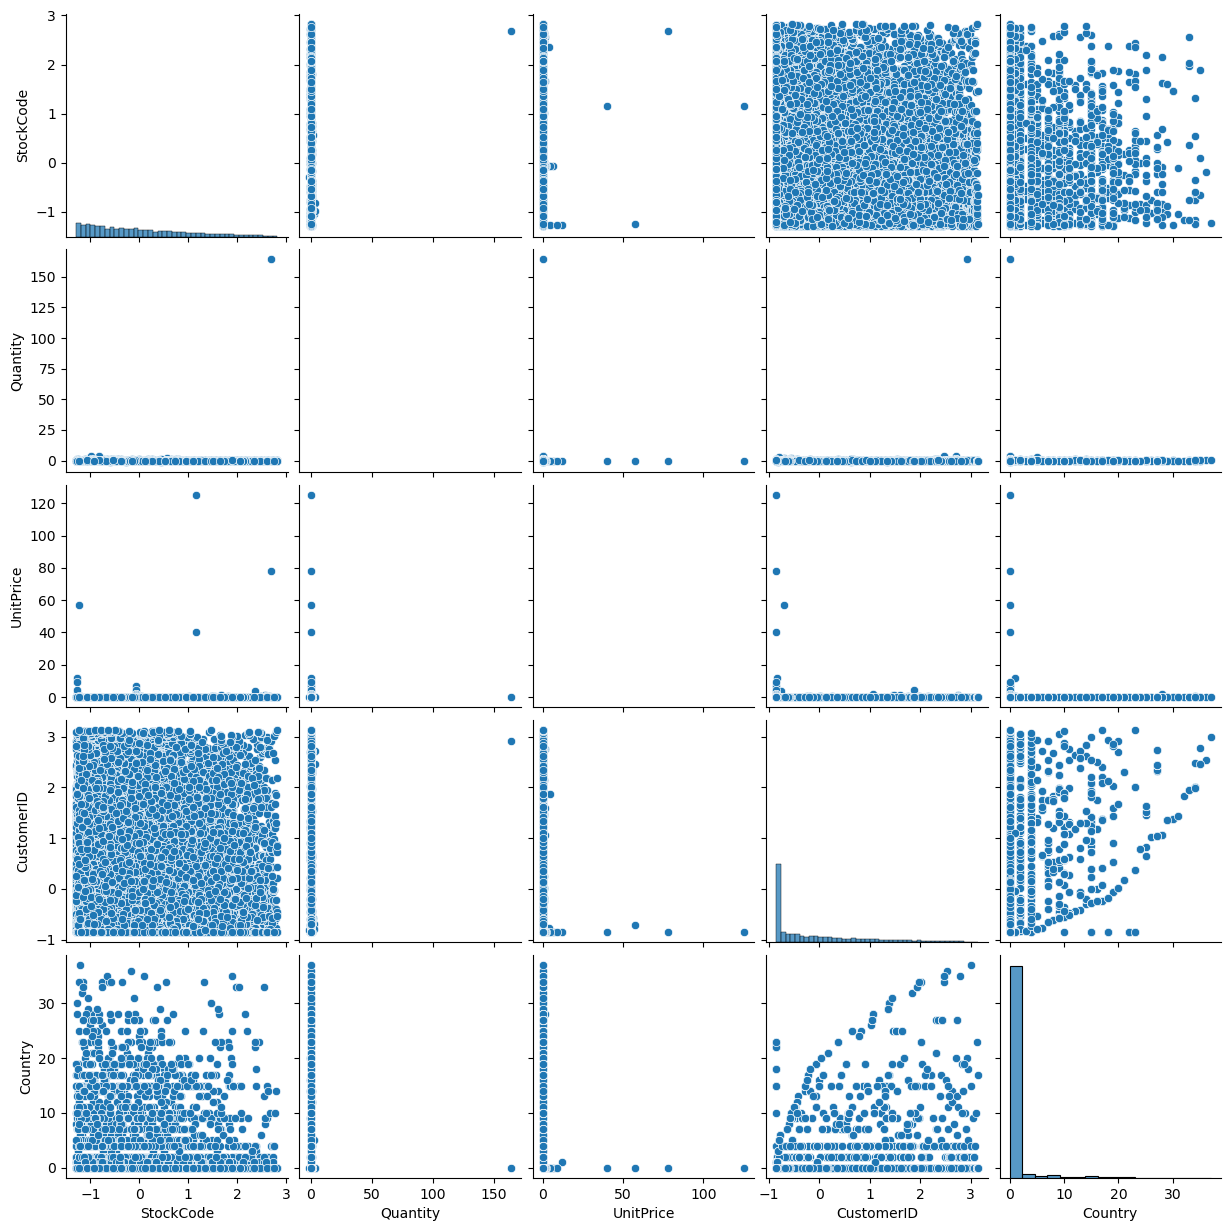

In [27]:
import seaborn as sns
sns.pairplot(df_prep)

## MODEL SELECTION AND TRAINING

In [28]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [29]:
sse=[]
for i in range(1,20):
    model=KMeans(n_clusters=i,random_state=42,n_init="auto")
    model.fit(df_prep)
    sse.append(model.inertia_)

sse

[310362.29872670275,
 154054.47813270485,
 128664.8084909496,
 109447.46123581783,
 82493.01470195397,
 67902.33495344683,
 61912.438888228455,
 39340.59319223691,
 31099.45445783837,
 28011.611663254567,
 24634.56115627844,
 20822.339914094526,
 20066.736000523044,
 17994.737601880865,
 16765.17659813407,
 15232.865527892933,
 14295.379225665489,
 13853.599710065933,
 13176.158303942506]

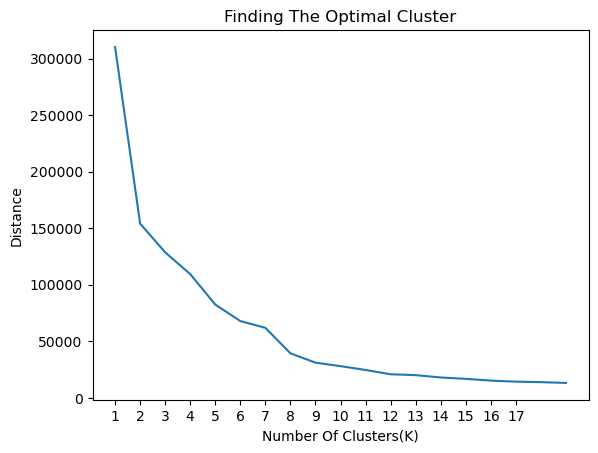

In [30]:
plt.plot(range(1,20),sse)
plt.xlabel("Number Of Clusters(K)")
plt.ylabel("Distance")
plt.xticks(range(1,18))
plt.title("Finding The Optimal Cluster")
plt.show()

In [48]:
model_kms=KMeans(n_clusters=8,n_init="auto",random_state=42)
model_kms.fit(df_prep)
labels=model_kms.labels_

In [49]:
df["ClusterKM"]=labels
df_prep["ClusterKM"]=labels

In [50]:
from sklearn.metrics import silhouette_score
silhouette_score(df_prep.drop("ClusterKM",axis=1), df_prep["ClusterKM"])

0.4478473968159809

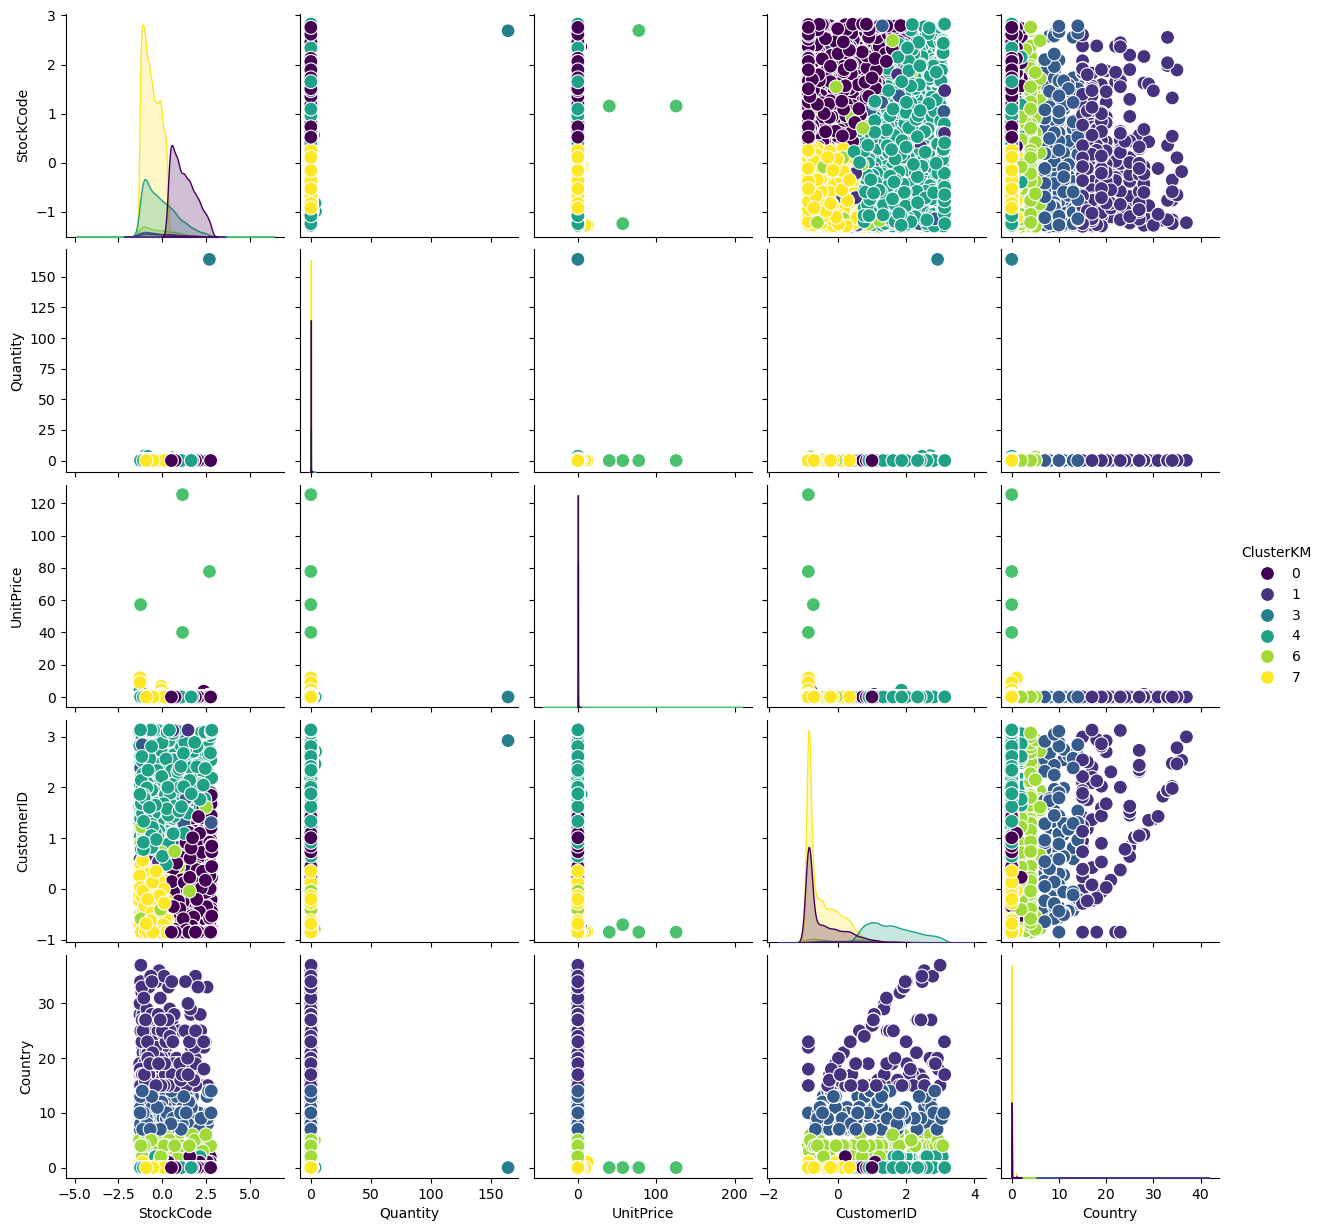

In [51]:
sns.pairplot(df_prep,hue="ClusterKM",palette="viridis",diag_kind='kde', plot_kws={'s': 100})

In [99]:
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country,ClusterKM
0,-1.186113,-0.022593,-0.025236,-1.075845,-0.186406,0
1,-1.184405,-0.022593,-0.021076,-1.075845,-0.186406,0
2,-1.182696,0.002995,-0.024246,-1.075845,-0.186406,0
3,-1.180988,-0.022593,-0.021076,-1.075845,-0.186406,0
4,-1.179279,-0.022593,-0.021076,-1.075845,-0.186406,0
...,...,...,...,...,...,...
19995,0.754824,-0.150537,-0.019293,2.274034,-0.186406,2
19996,2.131932,-2.952491,-0.037866,-0.883737,-0.186406,2
19997,-0.473639,-0.035388,0.004234,-0.883737,-0.186406,0
19998,-0.945205,0.054172,-0.013349,-0.883737,-0.186406,0


## Applying Aggloromorative Clustering

In [56]:
model_hrc=AgglomerativeClustering(n_clusters=6,linkage="complete")
model_hrc.fit(df_prep.drop("ClusterKM",axis=1))
label2=model_hrc.labels_

In [57]:
df["ClusterHC"]=label2

In [58]:
df_prep2=df_prep.drop("ClusterKM",axis=1)
df_prep2["ClusterHC"]=label2

In [59]:
silhouette_score(df_prep2.drop("ClusterHC",axis=1), df_prep2["ClusterHC"])

0.9050187101507154

In [60]:
df_prep2

,StockCode,Quantity,UnitPrice,CustomerID,Country,ClusterHC
0,-1.295552,-0.001269,-0.028920,-0.857276,0,0
1,-1.294189,0.023056,-0.034971,-0.856074,0,0
2,-1.292826,-0.023567,-0.026105,-0.854872,0,0
3,-1.291463,-0.023567,0.049952,-0.853670,0,0
4,-1.290100,-0.009378,-0.023995,-0.852468,0,0
...,...,...,...,...,...,...
27090,0.521332,-0.023567,-0.034759,-0.853670,0,0
27091,-0.675386,-0.023567,-0.031875,-0.627705,0,0
27092,-0.829405,0.023056,-0.034759,-0.205824,0,0
27093,-0.529544,0.029138,-0.016959,-0.853670,0,0


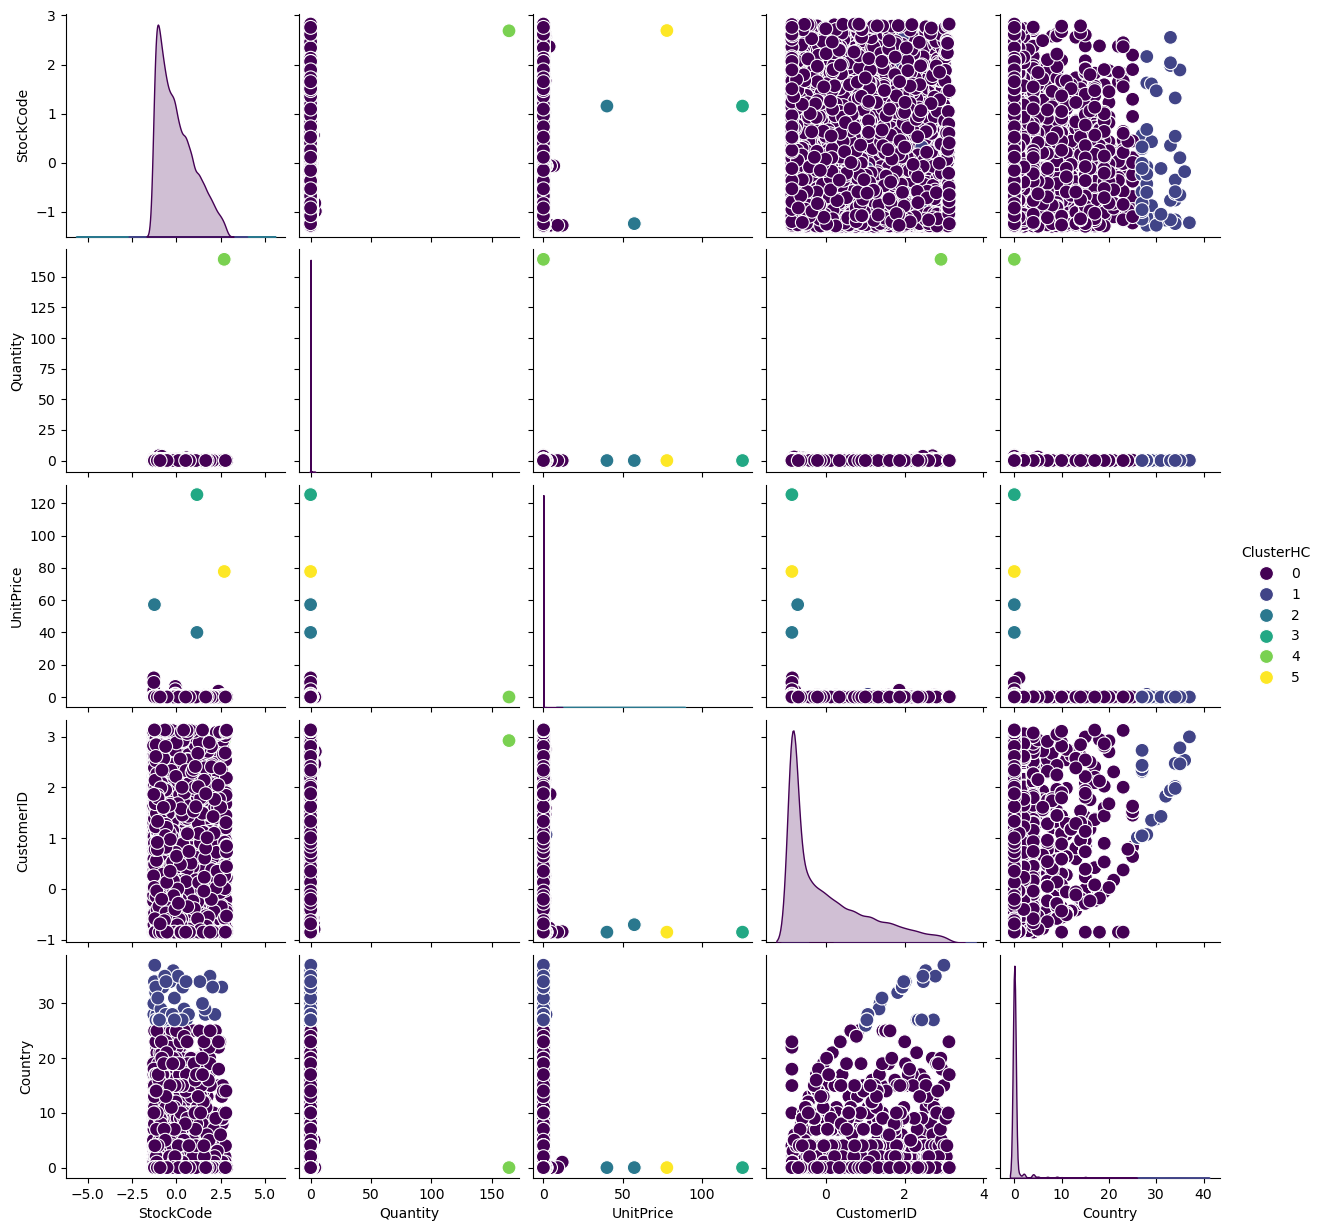

In [61]:
sns.pairplot(df_prep2,hue="ClusterHC",palette="viridis",diag_kind='kde', plot_kws={'s': 100})

In [62]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ClusterKM,ClusterHC
0,562608,23168,CLASSIC CAFE SUGAR DISPENSER,12,2011-08-08 11:45:00,1.25,15502.0,United Kingdom,7,0
1,553864,21294,ETCHED GLASS COASTER,24,2011-05-19 14:08:00,0.39,15862.0,United Kingdom,7,0
2,581146,22551,PLASTERS IN TIN SPACEBOY,1,2011-12-07 13:53:00,1.65,17602.0,United Kingdom,7,0
3,543200,15056bl,EDWARDIAN PARASOL BLACK,1,2011-02-04 13:03:00,12.46,NaN,United Kingdom,7,0
4,564355,47591D,PINK FAIRY CAKE CHILDRENS APRON,8,2011-08-24 15:12:00,1.95,13507.0,United Kingdom,7,0
...,...,...,...,...,...,...,...,...,...,...
27090,558475,21803,CHRISTMAS TREE STAR DECORATION,1,2011-06-29 15:58:00,0.42,NaN,United Kingdom,0,0
27091,553657,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,1,2011-05-18 11:28:00,0.83,14583.0,United Kingdom,7,0
27092,552533,23000,TRAVEL CARD WALLET TRANSPORT,24,2011-05-10 09:41:00,0.42,13767.0,United Kingdom,7,0
27093,548203,22676,FRENCH BLUE METAL DOOR SIGN 1,27,2011-03-29 16:40:00,2.95,NaN,United Kingdom,7,0


## APPLYING DBSCAN

In [89]:
from sklearn.cluster import DBSCAN
model_db=DBSCAN(eps=1.2,min_samples=80)
model_db.fit(df_prep.drop("ClusterKM",axis=1))
labels3=model_db.labels_
labels3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
df_prep3=df_prep.drop("ClusterKM",axis=1)
df_prep3["ClusterDB"]=labels3

In [91]:
silhouette_score(df_prep3.drop("ClusterDB",axis=1), df_prep3["ClusterDB"])


0.8593180053806041

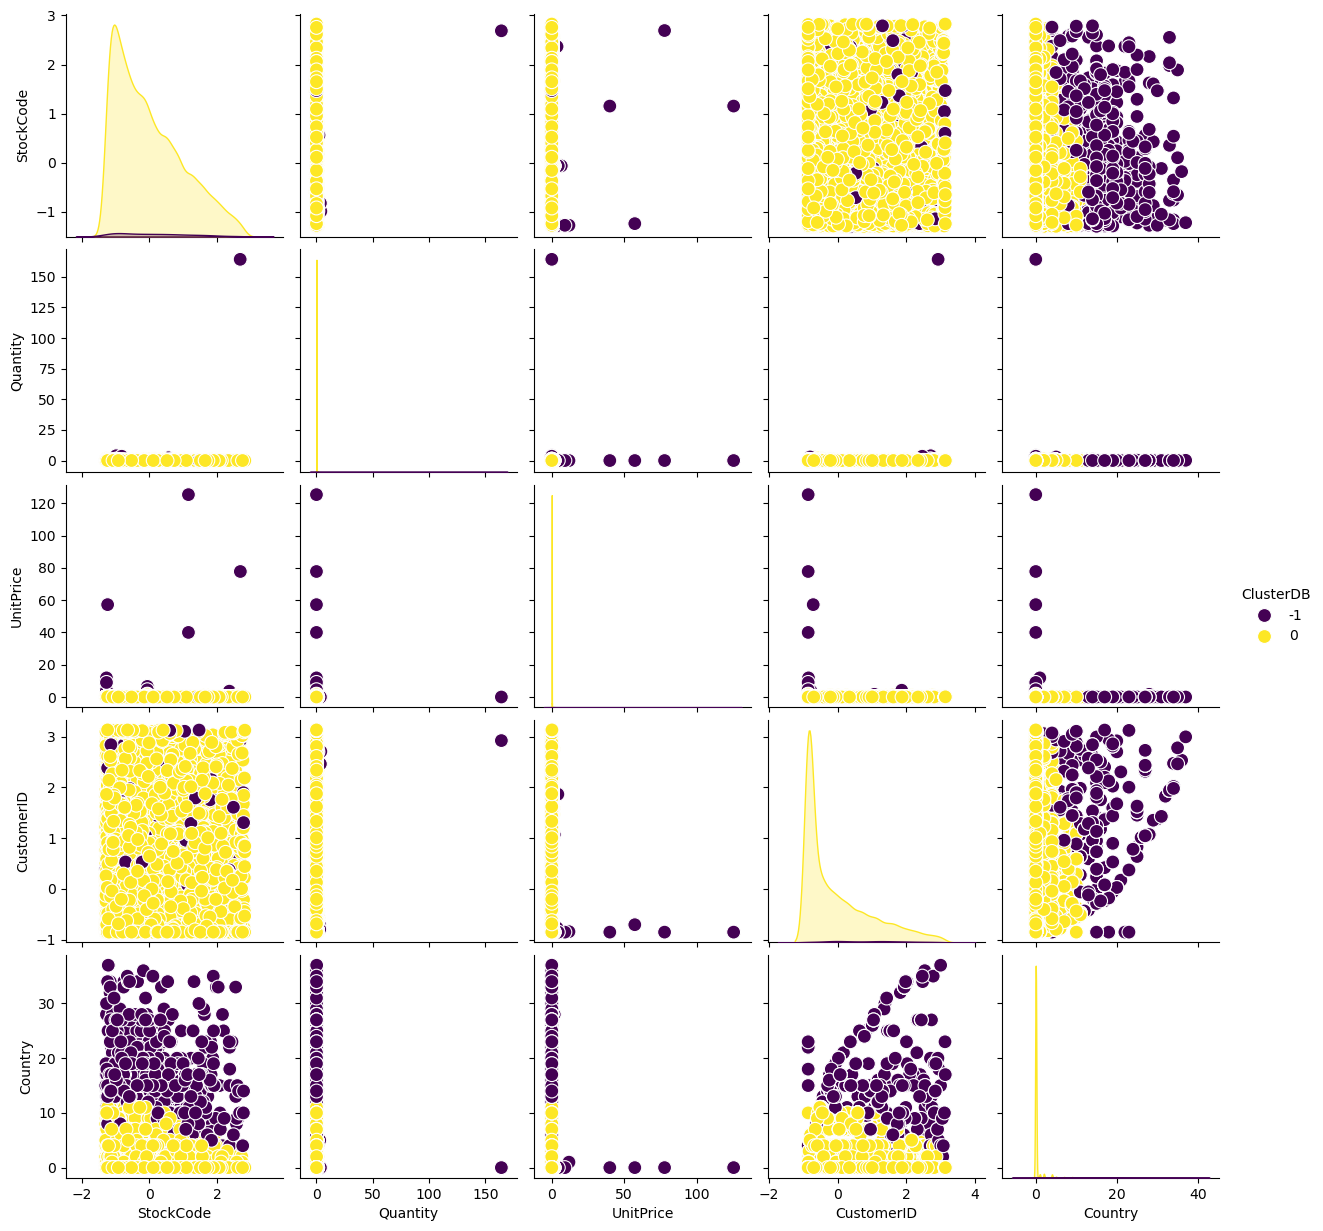

In [92]:
sns.pairplot(df_prep3,hue="ClusterDB",palette="viridis",diag_kind='kde', plot_kws={'s': 100})

## ADDING THE PREDICTION MODEL(PREDICTING THE CATEGORY ONE FALLS IN PRIOR TO BEHAVIOUR)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [130]:
X=df_prep3.drop("ClusterDB",axis=1)
y=df_prep3.ClusterDB
X

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,-1.295552,-0.001269,-0.028920,-0.857276,0
1,-1.294189,0.023056,-0.034971,-0.856074,0
2,-1.292826,-0.023567,-0.026105,-0.854872,0
3,-1.291463,-0.023567,0.049952,-0.853670,0
4,-1.290100,-0.009378,-0.023995,-0.852468,0
...,...,...,...,...,...
27090,0.521332,-0.023567,-0.034759,-0.853670,0
27091,-0.675386,-0.023567,-0.031875,-0.627705,0
27092,-0.829405,0.023056,-0.034759,-0.205824,0
27093,-0.529544,0.029138,-0.016959,-0.853670,0


## HANDLING CLASS IMABALANCE

In [131]:
from imblearn.combine import SMOTETomek

tomek=SMOTETomek(random_state=42)
X,y=tomek.fit_resample(X,y)

In [132]:
y=y.map({-1:1,0:0})

y.value_counts()

ClusterDB
0    26479
1    26479
Name: count, dtype: int64

## FINE TUNING AND MODEL SELECTION

In [133]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

mdls = [
    ("RandomForest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier()),
    ("LogisticRegression", LogisticRegression())
]
scores=[]
CV=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for name,model in mdls:
    score=cross_val_score(estimator=model,X=X,y=y,cv=CV)
    scores.append({"Model":name,"Score":np.mean(score)})
scores

[{'Model': 'RandomForest', 'Score': 0.9988292641303781},
 {'Model': 'XGBoost', 'Score': 0.9984516010144849},
 {'Model': 'LogisticRegression', 'Score': 0.9937497628808135}]

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model2=RandomForestClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7921
           1       1.00      1.00      1.00      7967

    accuracy                           1.00     15888
   macro avg       1.00      1.00      1.00     15888
weighted avg       1.00      1.00      1.00     15888

